In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind,f_oneway,levene,kruskal,chi2_contingency,chisquare,shapiro

In [52]:
# We're loading the Yulu data by using read_csv method of pandas
df_yulu = pd.read_csv('bike_sharing.csv')
df_yulu.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [53]:
# we're interested in knowing the datatypes of each column so we use info() for retreiving the details of each column
df_yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [54]:
# we're identifying the rows and columns of the dataframe
df_yulu.shape

(10886, 12)

In [55]:
# describe() returns the description of each of the numerical columns
df_yulu.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [56]:
# checking for count of null values in each column
df_yulu.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [57]:
### finding the pairwise coorelation of all the columns in the dataframe df_yulu
df_yulu.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


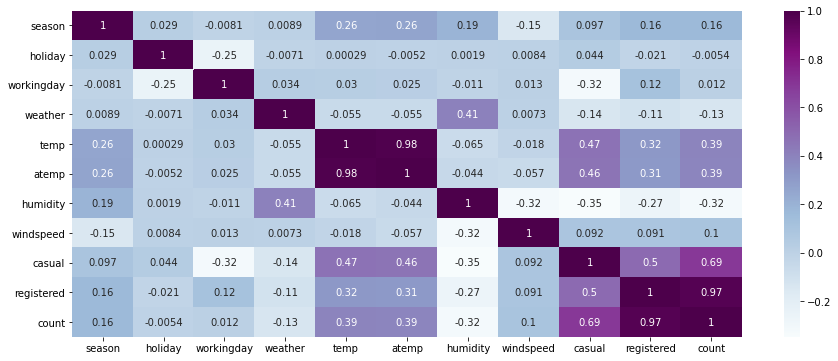

In [58]:
### plotting a figure with width as 15 and height as 6
plt.figure(figsize=(15,6))
### Heatmap adds the color to correlated value and we have passed annot = True which will mention the correlation value 
### inside the color. Darker shades of the chart represent higher values than the lighter shade
sns.heatmap(df_yulu.corr(),cmap='BuPu',annot=True)
plt.show()

In [59]:
df_yulu['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

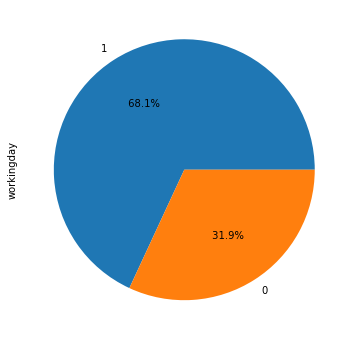

In [60]:
### we're plotting a pie plot for workingday Column
plt.figure(figsize=(6,6))
df_yulu['workingday'].value_counts().plot.pie(autopct='% 0.1f%%')
plt.show()

In [61]:
df_yulu['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

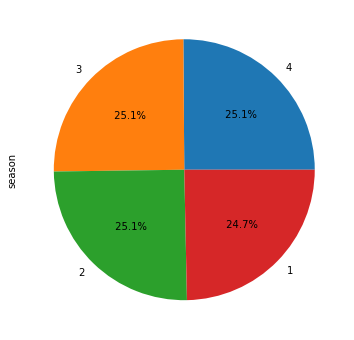

In [62]:
### we're plotting a pie plot for season Column
plt.figure(figsize=(6,6))
df_yulu['season'].value_counts().plot.pie(autopct='% 0.1f%%')
plt.show()

In [63]:
df_yulu['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

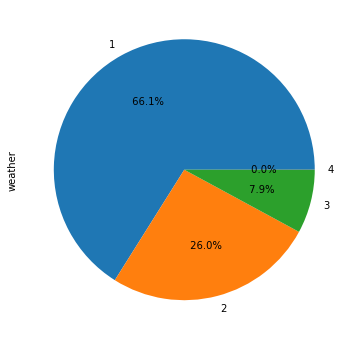

In [64]:
### we're plotting a pie plot for weather Column
plt.figure(figsize=(6,6))
df_yulu['weather'].value_counts().plot.pie(autopct='% 0.1f%%')
plt.show()

In [65]:
df_yulu['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

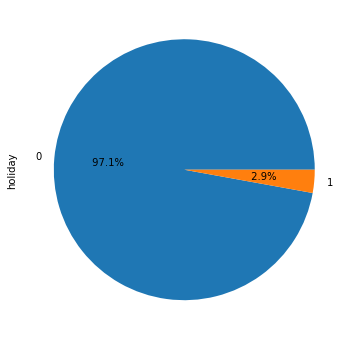

In [66]:
### we're plotting a pie plot for holiday Column
plt.figure(figsize=(6,6))
df_yulu['holiday'].value_counts().plot.pie(autopct='% 0.1f%%')
plt.show()

In [76]:
### We'll define the level of significance to 0.05 for all the below scenarios.
alpha = 0.05

##### 1. We're checking if the working day has an effect on the number of cycles purchased.

In [67]:
df_yulu.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


<AxesSubplot:xlabel='workingday', ylabel='count'>

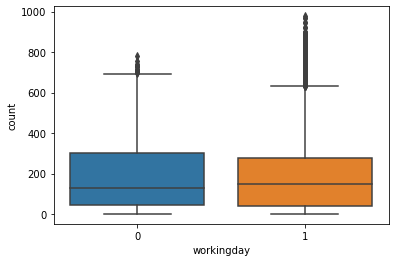

In [84]:
## plotting a boxplot for column workingday against the column count to identify the median in respective weather column value.
sns.boxplot(x='workingday',y='count',data=df_yulu)

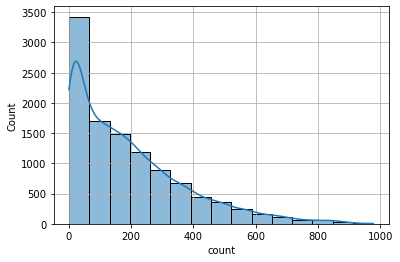

In [85]:
## plotting a histogram for column count with a density curve.
sns.histplot(df_yulu['count'],kde = True,bins = 15)
plt.grid()

In [86]:
## We're grouping the dataframe upon workingday and fetching the mean of the count column from respective group.
df_yulu.groupby('workingday')['count'].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

#### We're defining the Null and Alternate Hypothesis:
##### Null Hypothesis : The Non Working Day & Working Day has no significance with respect to Count 
##### Alternate Hypothesis : Working Day Count is greater than Non Working Day Count
##### We're defining a threshold alpha which is the level of significance based on which we'll either reject or approve the null hypothesis.

In [87]:
## We're retrieving the records on the workingday values and storing them in two dataframes.
working = df_yulu[df_yulu['workingday'] == 1]
nonworking = df_yulu[df_yulu['workingday'] == 0]

In [88]:
## We're calculating the ttest_ind on the two independent samples.
t_stat, p_value = ttest_ind(working['count'],nonworking['count'],alternative='greater')
p_value

0.11322402113180674

In [89]:
## Comparing the obtained p_value from the ttest_ind with the defined alpha (significance level) 
p_value < alpha

False

##### We observe that the p-value is greater than the alpha (significance level) so we'll continue to assume the null hypothesis. 

##### 2. We're checking whether the number of cycles rented in different weathers are same or different.

In [27]:
df_yulu.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


<AxesSubplot:xlabel='weather', ylabel='count'>

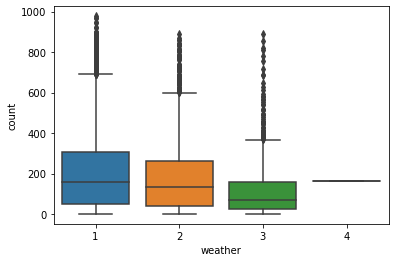

In [90]:
## plotting a boxplot for weather against the count to identify the median in respective weather column value.
sns.boxplot(x='weather',y='count',data=df_yulu)

##### From the above plot there is a significance among the all the weathers. Since weather 4 is having the least or negligible count so we'll focus on the rest three weathers and perform the further testing

In [79]:
## We're retrieving the records on the weather values and storing them in respective dataframes.
weather1 = df_yulu[df_yulu['weather'] == 1]
weather2 = df_yulu[df_yulu['weather'] == 2]
weather3 = df_yulu[df_yulu['weather'] == 3]

In [80]:
df_yulu.groupby('weather')['count'].mean()

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

##### Since there is involvement of two or more samples are associated of a single independent variable so we'll opt for ANOVA

##### ANOVA assumes that the data is normally distributed and the variance among the different samples/groups should be approx. equal

##### For testing whether the data is Gaussian we'll perform Shapiro Test on individual sample. We'll not consider the sample size to be large as it won't give an accurate result.
##### By default Shapiro test assumes that the data is Gaussian.
##### Null Hypothesis : Data given follows a normal distribution.
##### Alternate Hypothesis : Data given doesn't align a normal distribution.

In [106]:
norm_w1 = weather1.sample(200)
stats, p_valuew1 = shapiro(norm_w1['count'])
p_valuew1

1.5245902318383742e-09

In [107]:
norm_w2 = weather2.sample(200)
stats, p_valuew2 = shapiro(norm_w2['count'])
p_valuew2

5.652968869916675e-13

In [108]:
norm_w3 = weather3.sample(200)
stats, p_valuew3 = shapiro(norm_w3['count'])
p_valuew3

1.7589979844072372e-16

##### From the above shapiro test on individual sample we noticed that the p_value for each group of the independent variable is lesser than the alpha.
##### So we conclude from the Shapiro test is that the data is not normally distributed.

##### Now for testing the homogeneity of the variance across different samples we'll go for Levene's test.

In [110]:
levene(weather1['count'],weather2['count'],weather3['count'])

LeveneResult(statistic=81.67574924435011, pvalue=6.198278710731511e-36)

##### From the Levene test we conclude that the variance across the groups are not equal.

##### Since the homogenity of variance is violated so we'll go for Krushal-Wallis test and it doesn't require any assumptions about population probability distributions

In [111]:
kruskal(weather1['count'],weather2['count'],weather3['count'])

KruskalResult(statistic=204.95566833068537, pvalue=3.122066178659941e-45)

##### Even though the Non parametric test like levene test can show the result but it still not that powerful compared to parametric test ANOVA which shows a significant result.

##### Null Hypothesis : all the three weathers have similar count of rented cycles
##### Alternate Hypothesis : all the three weathers have different count

In [112]:
## We're performing the ANOVA testing to approve or reject the null hypothesis.
stat , p_value = f_oneway(weather1['count'],weather2['count'],weather3['count'])
p_value

4.976448509904196e-43

In [83]:
## Comparing the obtained p_value from the ANOVA with the defined alpha (significance level) 
p_value < alpha

True

##### We observe that the p-value is lesser than the alpha (significance level) so we'll reject the null hypothesis.
##### We infer that different weathers have different count for cycles rented.

##### 3. We're checking whether the number of cycles rented in different seasons are same or different.

In [36]:
df_yulu.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


<AxesSubplot:xlabel='season', ylabel='count'>

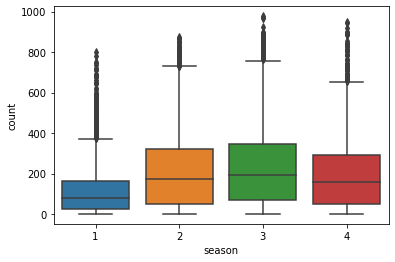

In [37]:
## plotting a boxplot for the column season against the dependent column count.
sns.boxplot(x='season',y='count',data=df_yulu)

###### from the above boxplot we infer that the season 2,3 and 4 have no significance though season 3 has higher median and compared to season 1 they have significant difference in median.

In [38]:
df_yulu.groupby('season')['count'].mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

In [39]:
## We're retrieving the records on the season values and storing them in respective dataframes.
season1 = df_yulu[df_yulu['season'] == 1]
season2 = df_yulu[df_yulu['season'] == 2]
season3 = df_yulu[df_yulu['season'] == 3]
season4 = df_yulu[df_yulu['season'] == 4]

##### For this also we'll opt for ANOVA since there are more than two samples / group from a single independent variable.

In [117]:
## We'll start with Shapiro test for normality test
norm_s1 = season1.sample(200)
stats, p_values1 = shapiro(norm_s1['count'])

norm_s2 = season2.sample(200)
stats, p_values2 = shapiro(norm_s2['count'])

norm_s3 = season3.sample(200)
stats, p_values3 = shapiro(norm_s3['count'])

norm_s4 = season4.sample(200)
stats, p_values4 = shapiro(norm_s4['count'])

(p_values1,p_values2,p_values3,p_values4)

(2.391724581514605e-15,
 1.364081625432334e-10,
 2.807146870509314e-08,
 4.270586054927472e-12)

##### From the above shapiro test on individual sample we noticed that the p_value for each group of the independent variable is lesser than the alpha.
##### So we conclude from the Shapiro test is that the data is not normally distributed.

In [120]:
##### For the homogeneity of Variance we'll do the levene test
levene(season1['count'],season2['count'],season3['count'],season4['count'])

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

##### The assumptions of ANOVA are violated so now we'll go for non parametric Kruskal Wallis Test

In [121]:
kruskal(season1['count'],season2['count'],season3['count'],season4['count'])

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

##### ANOVA being the parametric so will get significant result

##### Null Hypothesis : all the four seasons have similar count of rented cycles
##### Alternate Hypothesis : all the four seasons have different count

In [41]:
stat , p_value = f_oneway(season1['count'],season2['count'],season3['count'],season4['count'])
p_value

6.164843386499654e-149

##### We observe that the p-value is lesser than the alpha (significance level) so we'll reject the null hypothesis.
##### We infer that different seasons have different count for cycles rented.

##### 4. We're checking whether the columns weather and seasons are independent.

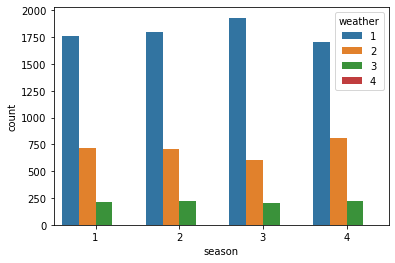

In [124]:
##### plotting a countplot for season column
sns.countplot(x='season',data=df_yulu,hue='weather')
plt.show()

##### Null Hypothesis : Weather and season are Independent
##### Alternate Hypothesis : weather is dependent on season

In [48]:
vals = pd.crosstab(df_yulu['weather'],df_yulu['season'])
vals

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [50]:
chi2_contingency(vals)

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

##### We observe that the p-value is lesser than the alpha (significance level) so we'll reject the null hypothesis.
##### We infer that weather is dependent on the season.

### INSIGHTS:

##### 1. From the Bivariate Analysis on workingday and count it was observed that there is no significance among the two workingday groups 0 & 1.
##### 2. From the Bivariate Analysis of weather and count we observed that there is a significance among the all the weathers and weather 4 is having the least or negligible count.
##### 3. From boxplot of seasom and count the season 2,3 and 4 have no significance though season 3 has higher median and compared to season 1 they have significant difference in median.
##### 4. We plotted a countplot of season column with numerical column Weather as hue and observed that weather 1 is having significant highest count across all the seasons.
##### 5. From the ttest_ind test we conclude that the number of cycles rented in the working day is greater than the non working day.
##### 6. Based on the assumptions of ANOVA we observed that it was violated and was a need to go for Kruskal-Wallis test as it doesn't need any assumptions for testing and found out that we reject the null hypothesis of cycles being rented in different weathers / seasons are equal.
##### 7. We performed a cross tabulation between weather and season and tested them for chi2_contigency and concluded that weather is dependent on season.